Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best accuracy for KNN: 0.6519
KNN Accuracy: 0.6061
              precision    recall  f1-score   support

           0       0.54      0.50      0.52        14
           1       0.65      0.68      0.67        19

    accuracy                           0.61        33
   macro avg       0.59      0.59      0.59        33
weighted avg       0.60      0.61      0.60        33



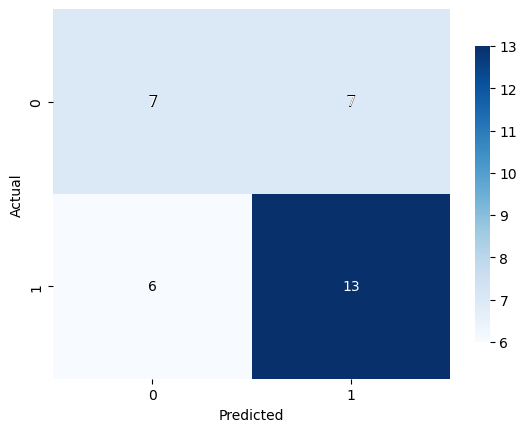

In [12]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
try:
    df = pd.read_excel('Gait_ML_featured_data.xlsx')
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# Splitting the data
X = df.iloc[:, 1:5].values
y = df.iloc[:, 5].values

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

# KNN with Grid Search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

print(f"Best parameters for KNN: {grid_search.best_params_}")
print(f"Best accuracy for KNN: {grid_search.best_score_:.4f}")

best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Evaluation
print(f"KNN Accuracy: {accuracy_score(Y_test, y_pred):.4f}")
print(classification_report(Y_test, y_pred))
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12, "color": "black"},
            cbar_kws={"shrink": 0.8})
# Confusion matrix visualization
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = 'white' if cm[i, j] > cm.max() / 2 else 'black'
        plt.text(j + 0.5, i + 0.5, cm[i, j], horizontalalignment='center', 
                 verticalalignment='center', color=color)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

